In [1]:
import pandas as pd
import numpy as np
import os
import glob

import matplotlib.pyplot as plt
# plt.rcParams['figure.figsize'] = (15, 5)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
from helpers import *

# Data prep

Läs in fil

In [3]:
df = pd.read_csv('../indata/ODB_TSV/odbBefolkUpd efter område, tid, ålder och kön.txt', sep='\t', header=1)

Specificera indexering

In [4]:
df = df.set_index(['område', 'tid'])

Vänd ner samtliga kolumner i en kolumn

In [5]:
df = pd.DataFrame(df.stack())

Lyft ut index till kolumner igen

In [6]:
df = df.reset_index()

Sätt beskrivande kolumnnamn

In [7]:
df = df.rename(columns={'level_2': 'agegroup_gender', 0: 'value', 'tid':'year'})

Splitta områdesnamn till endast baskod

In [8]:
df['område'] = df['område'].str.split(' ', 1, expand = True)
df = df.rename(columns={'område': 'BASKOD2010'})
df['BASKOD2010'] = df['BASKOD2010'].astype(str).astype(int)

Byt om `BASKOD2010` till entity-namnet

In [9]:
df = baskod2010tobasomrade(df)

Splitta ut `ageyeargender` till fyra separata kolumner

In [10]:
df['Kön'] = df['agegroup_gender'].str.split().str[-1]

In [11]:
df['agegroup'] = df['agegroup_gender'].str.split().str[0]

Specificera ordningen på kolumnerna

In [12]:
df = df[['basomrade','year', 'Kön', 'agegroup', 'value']]

Specificera indexering

In [13]:
df = df.set_index(['basomrade'])

In [14]:
# df = df.groupby(['basomrade', 'year', 'kategori', 'Kön']).sum().reset_index()

Sätt `Kön` till en pandas category

In [15]:
df['Kön'] = df['Kön'].astype('category')
df['Kön'].cat.categories = ['female', 'male']

# Totalbefolkning

In [16]:
concept = 'population_total'

In [17]:
popTotGender = df.groupby(['basomrade', 'year', 'Kön']).sum().reset_index()

In [18]:
male, female = byGender(concept, popTotGender, new=True)

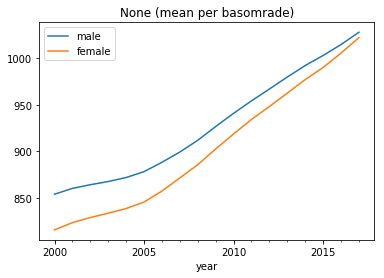

In [19]:
plotcombined(male, 'male', concept)
plotcombined(female, 'female')

In [20]:
popTot = df.groupby(['basomrade', 'year']).sum().reset_index()

In [21]:
total = appendNewDatapoints(concept, popTot, new=True)

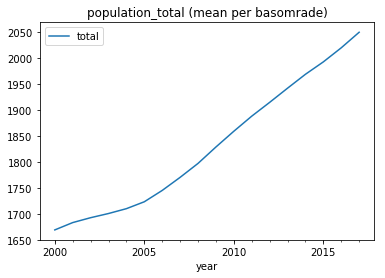

In [22]:
plotcombined(total, 'total', concept)